In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [5]:
# read the file
crypto_tweets = pd.read_csv(r'C:\Users\Matthew\Desktop\Университет\vaderDiploma\nlp_datasets-main\crypto_tweets.csv')
crypto_tweets.head()

,user_location,date,text
0,SA KwaZulu-Natal Richards Bay,2021-07-26 23:18:37,@Auditchain Buy #DBA @Dafriexchange ongoing pr...
1,Terraqueous Globe,2021-08-06 22:22:14,"Hate to say it fellas, but... \n\n#BTC https:/..."
2,Surabaya,2021-07-29 06:30:38,"#Airdrop : NEXTYPE\n🔥Reward: $5,000 valued NT ..."
3,Colorado,2021-08-25 02:16:19,"See below. In a few years, people will say the..."
4,Canada,2021-04-22 18:30:04,#Bitcoin price in US Dollar #BTC $usd #BTCUSD ...


In [6]:
crypto_tweets.sort_values('date', inplace=True)
crypto_tweets.groupby('date').count()

,user_location,text
date,,
2021-02-05 17:29:43,1,1
2021-02-06 00:12:07,1,1
2021-02-06 16:00:04,1,1
2021-02-06 16:24:44,1,1
2021-02-06 19:36:04,1,1
...,...,...
2021-11-26 23:04:33,1,1
2021-11-26 23:17:53,1,1
2021-11-26 23:19:12,1,1


In [7]:
crypto_tweets.groupby('date').count().query('text>1')

,user_location,text
date,,
2021-08-09 13:14:40,2,2
2021-10-20 05:00:01,2,2
2021-11-18 17:20:10,2,2


In [8]:
crypto_tweets["text"] = crypto_tweets["text"].apply(str)
tweets = crypto_tweets["text"].tolist()
tweets[0:11]

['Bitcoin is now accepted as payment for flights, homes and hotels by travel firm Travala - using Binance Pay 🚀\n\n#Bitcoin #BTC',
 'By using https://t.co/rYz1fSKM2V you will capitalise on the Exact-Match domain endless competitive advantages combi… https://t.co/Q70QGfPW7Q',
 'Bitcoin - BTC\nPrice: $40,789.10\nChange in 1h: +1.63557849%\nMarket cap: $759,540,987,587.21\nRanking: 1\n#Bitcoin #BTC',
 '@TimNegron_ @DocumentingBTC Me, a novice and I mean a special kind of novice (literally thought you needed $37,000+… https://t.co/tFkPUVOuIo',
 '#cryptocurrency going up baby!!!\n#XRP #Bitcoin #BTC #dogecointoadollar #ETH',
 '@BearsOutreach @ChicagoBears @ByTheHandClub If You Own #dogecoin Hit That Retweet &amp; follow Button… https://t.co/q5vmSLJVpd',
 '2021 #SuperBowl 55 - What Will happen to the Price of #Bitcoin (BTC) During the Superbowl? -… https://t.co/QlIl0tebTO',
 'Have you seen this beautiful photo 👍 No 12 and check out the volume #DOGE #dogecoin #doge #dogeto1dollar… https://t.co

In [17]:
def processTweet(tweet): 
    # process the tweets
    #Convert to lower case
    tweet = tweet.lower()
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)#trim
    tweet = tweet.strip('\'"')
    return tweet
#end
tweets_cleaned = []
#Read the tweets one by one and process it
for i in range (0,len(tweets)):
    processedTweet = processTweet(tweets[i])
    tweets_cleaned.append(processedTweet)
print(len(tweets_cleaned))
crypto_tweets['cleaned_text']=tweets_cleaned
crypto_tweets.head()

3940


,user_location,date,text,cleaned_text
634,Decentralised,2021-02-05 17:29:43,Bitcoin is now accepted as payment for flights...,bitcoin is now accepted as payment for flights...
2205,The Internet,2021-02-06 00:12:07,By using https://t.co/rYz1fSKM2V you will capi...,by using URL you will capitalise on the exact-...
2737,Blockchain,2021-02-06 16:00:04,"Bitcoin - BTC\nPrice: $40,789.10\nChange in 1h...","bitcoin - btc price: $40,789.10 change in 1h: ..."
1077,"Nashville, TN",2021-02-06 16:24:44,"@TimNegron_ @DocumentingBTC Me, a novice and I...","AT_USER AT_USER me, a novice and i mean a spec..."
82,"Hudson, WI",2021-02-06 19:36:04,#cryptocurrency going up baby!!!\n#XRP #Bitcoi...,cryptocurrency going up baby!!! xrp bitcoin bt...


In [16]:
vader = SentimentIntensityAnalyzer()
def getTweetScore(Tweets):
    score = vader.polarity_scores(Tweets)['compound']
    return score
scores = []
#Read the tweets one by one and get the sentiment score
for i in range (0,len(tweets_cleaned)):
    tweets_score = getTweetScore(tweets_cleaned[i])
    scores.append(tweets_score)   
dict_tweets ={"tweets": tweets_cleaned, "score" : scores}
data_tweets_emoji = pd.DataFrame(dict_tweets)
print(data_tweets_emoji.shape)
data_tweets_emoji.head(11)

(3940, 2)


,tweets,score
0,bitcoin is now accepted as payment for flights...,0.1779
1,by using URL you will capitalise on the exact-...,0.4939
2,"bitcoin - btc price: $40,789.10 change in 1h: ...",0.0000
3,"AT_USER AT_USER me, a novice and i mean a spec...",0.4019
4,cryptocurrency going up baby!!! xrp bitcoin bt...,0.0000
5,AT_USER AT_USER AT_USER if you own dogecoin hi...,0.0000
6,2021 superbowl 55 - what will happen to the pr...,0.0000
7,have you seen this beautiful photo 👍 no 12 and...,0.5307
8,"looking up-close... btw, 8 mins trend band (re...",0.0000
9,AT_USER AT_USER if you own dogecoin hit the fo...,0.0000


In [20]:
mood_by_month = crypto_tweets[['date', 'cleaned_text']].merge(data_tweets_emoji, how='left', left_on='cleaned_text', right_on='tweets')
mood_by_month.drop(labels=['tweets'], axis=1, inplace=True)
mood_by_month.head()

,date,cleaned_text,score
0,2021-02-05 17:29:43,bitcoin is now accepted as payment for flights...,0.1779
1,2021-02-06 00:12:07,by using URL you will capitalise on the exact-...,0.4939
2,2021-02-06 16:00:04,"bitcoin - btc price: $40,789.10 change in 1h: ...",0.0000
3,2021-02-06 16:24:44,"AT_USER AT_USER me, a novice and i mean a spec...",0.4019
4,2021-02-06 19:36:04,cryptocurrency going up baby!!! xrp bitcoin bt...,0.0000


In [23]:
mood_by_month['date'] = pd.to_datetime(mood_by_month['date'], format='%Y-%m-%d %H:%M:%S')
mood_by_month.set_index('date', inplace=True)
mood_by_month1 = mood_by_month.resample('1M')['score'].sum()
mood_by_month1.head()

date
2021-02-28    42.6044
2021-03-31     0.0121
2021-04-30    23.2491
2021-05-31     9.1378
2021-06-30    59.5128
Freq: M, Name: score, dtype: float64

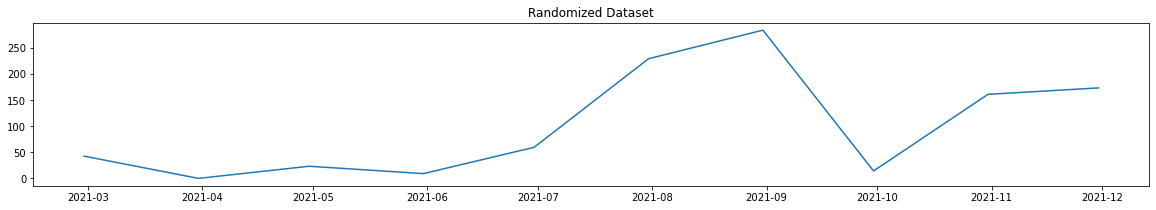

In [35]:
plt.plot(mood_by_month1)
plt.rcParams["figure.figsize"] = (20,3)
plt.title('Randomized Dataset')
plt.show()

In [31]:
# experiment on data from the whole dataset
whole_daily_mood = pd.read_csv(r'C:\Users\Matthew\Desktop\Университет\vaderDiploma\nlp_datasets-main\btc_score_daily_raw.csv',
                              skiprows=3, names=['date', 'mean', 'std', 'var'])
whole_daily_mood['date'] = pd.to_datetime(whole_daily_mood['date'], format='%Y-%m-%d')
whole_daily_mood.set_index('date', inplace=True)
whole_daily_mood.head()

,mean,std,var
date,,,
2021-02-05,0.151515,0.375420,0.140940
2021-02-06,0.148199,0.356104,0.126810
2021-02-07,0.145060,0.340988,0.116273
2021-02-08,0.166337,0.355058,0.126066
2021-02-09,0.155760,0.362583,0.131466


In [32]:
whole_monthly_mood = whole_daily_mood.resample('1M')['mean'].median()
whole_monthly_mood.head()

date
2021-02-28    0.151515
2021-03-31    0.157428
2021-04-30    0.151958
2021-05-31    0.160743
2021-06-30    0.240464
Freq: M, Name: mean, dtype: float64

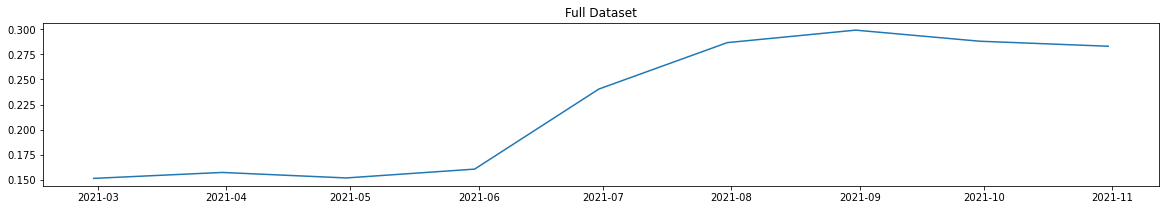

In [34]:
plt.plot(whole_monthly_mood)
plt.rcParams["figure.figsize"] = (20,3)
plt.title('Full Dataset')
plt.show()